# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 10

### Wstęp

Firma produkująca produkty mleczne posiada kilka zamówień do realizacji. Dane są zaprezentowane poniżej.

### Dane

**Ceny składników:**

| Składnik     | Cena (PLN) |
| :---         | ---: |
| Mleko (l)    | 3.5 |
| Cukier (kg)  | 5   |
| Kakao (100g) | 8   |
| Sól (kg)     | 2   |


**Składniki zapisane są w tabeli poniżej:**

| Prod.\Skł.| Mleko (l) | Cukier (kg)  | Kakao (100g) | Sól (kg)    |
| :---      |      ---: |         ---: |         ---: |        ---: |
| Masło     | 5         | 0            | 0            | 0           |
| Czekolada | 1         | 0.1          | 5            | 0.01        |
| Ser żółty | 10        | 0            | 0            | 0.05        |
| Twaróg    | 2         | 0            | 0            | 0.1         |


**Zamówienia klientów:**

| Klient\Prod.| Masło | Czekolada | Ser żółty | Twaróg |
| :---        |  ---: |      ---: |      ---: |   ---: |
| Klient 1    | 10    | 50        | 5         | 5      |
| Klient 2    | 120   | 90        | 15        | 25     |
| Klient 3    | 0     | 10        | 1         | 1      |


> **Uwaga**: Możesz użyć funkcji `plt.table` do wyświetlenia tabeli z wynikami.

> Informacja: Powyższe dane są przykładowe i nie mają przełożenia na faktyczne dane rynkowe.

### Zadanie 1

Korzystając z operacji macierzowych oblicz i odpowiedz na pytania:

#### A) Jaki jest koszt wyprodukowania każdego z produktów?






 

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [25]:
ingridients = np.array([[3.5, 5, 8, 2]])
products = np.array([[5, 0, 0, 0], [1, 0.1, 5, 0.01], [10, 0, 0, 0.05], [2, 0, 0, 0.1]])
orders = np.array([[10, 50, 5, 5], [120, 90, 15, 25], [0, 10, 1, 1]])

products_names = ['Masło', 'Czekolada', 'Ser żółty', 'Twaróg']
ingridients_names = ['Mleko', 'Cukier', 'Kakao', 'Sól']
clients_names = ['Klient 1', 'Klint 2', 'Klient 3']

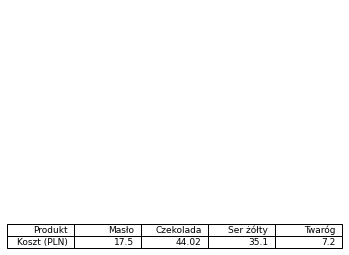

In [23]:
products_prices = ingridients @ products.T

columns = ['Produkt', 'Koszt (PLN)']
output_table = np.column_stack([columns, np.vstack([products_names, products_prices])])
plt.table(output_table)
plt.axis('off');

#### B) Ile składników zostanie uzytych na realizację zamówień klientów (każdego osobno i łącznie)?



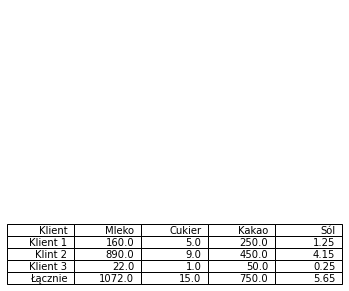

In [38]:
ingridients_for_orders = orders @ products
ingridients_total = np.ones((1, ingridients_for_orders.shape[0])) @ ingridients_for_orders

labels = ['Klient', *ingridients_names]
output_table = np.column_stack([clients_names, ingridients_for_orders])
output_table = np.row_stack([labels, output_table])
output_table = np.row_stack([output_table, ['Łącznie', *ingridients_total.flatten()]])
plt.table(output_table)
plt.axis('off');

#### C) Zakładając marżę $30\%$ (pomijając wszystkie inne czynniki), ile klienci będą musieli zapłacić za zrealizowanie zamówienia?



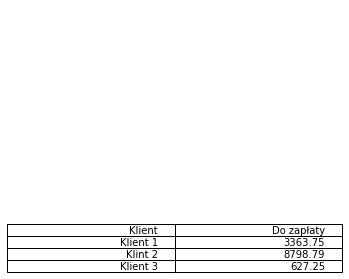

In [48]:
orders_production_cost = (orders @ products_prices.T) * 1.3

output_table = np.column_stack([clients_names, np.around(orders_production_cost, decimals=2)])
output_table = np.row_stack([['Klient', 'Do zapłaty'], output_table])
plt.table(output_table)
plt.axis('off');

#### D) Jaki jest łączny koszt składników jakie należy zamówić, aby zrealizować wszystkie zamówienia klientów?




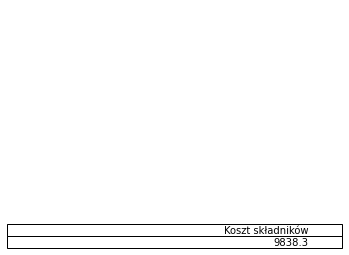

In [60]:
ingridients_order_price = ingridients_total @ ingridients.T

output_table = np.row_stack([['Koszt składników'], ingridients_order_price])
plt.table(output_table)
plt.axis('off');

### Zadanie 2

Napisać skrypt, który przyjmuje dwie macierze $A$ oraz $B$, a następnie wypisuje operacje wykonywane przy mnożeniu obu macierzy.

**Przykład:**

Wejście:

\begin{equation}
A = \begin{pmatrix}
1 & 2 & 1\\
4 & 4 & 5\\
6 & 7 & 7
\end{pmatrix}, 
 B = \begin{pmatrix}
-7 & -7 & 6\\
2 & 1 & -1\\
4 & 5 & -4
\end{pmatrix}
\end{equation}

Wyjście:

```
C[0, 0] = 1 * (-7) + 2 * 2 + 1 * 4 = 1
C[0, 1] = 1 * (-7) + 2 * 1 + 1 * 5 = 0
C[0, 2] = 1 * 6 + 2 * (-1) + 1 * (-4) = 0
C[1, 0] = 4 * (-7) + 4 * 2 + 5 * 4 = 0
C[1, 1] = 4 * (-7) + 4 * 1 + 5 * 5 = 1
C[1, 2] = 4 * 6 + 4 * (-1) + 5 * (-4) = 0
C[2, 0] = 6 * (-7) + 7 * 2 + 7 * 4 = 0
C[2, 1] = 6 * (-7) + 7 * 1 + 7 * 5 = 0
C[2, 2] = 6 * 6 + 7 * (-1) + 7 * (-4) = 1

[[1 0 0]
 [0 1 0]
 [0 0 1]]
```



In [69]:
A = np.array([[1, 2, 1], [4, 4, 5], [6, 7, 7]])
B = np.array([[-7, -7, 6], [2, 1, -1], [4, 5, -4]])

def format_num(num):
    if num >= 0:
        return f'{num}'
    else:
        return f'({num})'

def multiple(A, B):
    size_i = A.shape[0]
    size_j = B.shape[-1]
    size_k = A.shape[1]
    
    C = np.zeros((size_i, size_j))
    
    for i in range(size_i):
        for j in range(size_j):
            
            print(f'C[{i}, {j}] = ', end='')
            C_elem = 0
            
            for k in range(size_k):
                
                val_A = A[i, k]
                val_B = B[k, j]
                C_elem += val_A * val_B
                
                print(f'{format_num(val_A)} * {format_num(val_B)}', end='')
                if k != size_k - 1:
                    print(' + ', end='')

            C[i, j] = C_elem
            print(f' = {C_elem}')
            
    print()
    print(C)

multiple(A, B)

C[0, 0] = 1 * (-7) + 2 * 2 + 1 * 4 = 1
C[0, 1] = 1 * (-7) + 2 * 1 + 1 * 5 = 0
C[0, 2] = 1 * 6 + 2 * (-1) + 1 * (-4) = 0
C[1, 0] = 4 * (-7) + 4 * 2 + 5 * 4 = 0
C[1, 1] = 4 * (-7) + 4 * 1 + 5 * 5 = 1
C[1, 2] = 4 * 6 + 4 * (-1) + 5 * (-4) = 0
C[2, 0] = 6 * (-7) + 7 * 2 + 7 * 4 = 0
C[2, 1] = 6 * (-7) + 7 * 1 + 7 * 5 = 0
C[2, 2] = 6 * 6 + 7 * (-1) + 7 * (-4) = 1

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
